In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


In [2]:
df = pd.read_csv("ObesityDataSet.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

La DataFrame contient une combinaison de types de données, avec 8 colonnes de type float64, et 9 colonnes de type int32.
Chaque colonne a 2111 valeurs non-nulles, ce qui signifie qu'il n'y a pas de valeurs manquantes dans l'ensemble de données

In [4]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
df.shape

(2111, 17)

In [6]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Le résultat montre que toutes les colonnes ont 0 comme résultat, ce qui signifie qu'il n'y a pas de valeurs manquantes dans l'ensemble de données.

In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Age :

->La moyenne d'âge est d'environ 24.3 ans, avec un écart-type de 6.35, ce qui indique une certaine variabilité dans l'âge des participants.
->L'âge minimum est de 14 ans, ce qui suggère que l'étude pourrait inclure des adolescents.
->L'âge maximum est de 61 ans, indiquant que la population de l'étude est assez large en termes d'âge.
->50% des participants ont entre 19.9 et 26 ans, ce qui représente l'intervalle interquartile.

Height :

->La taille moyenne est de 1.70 mètres, avec un écart-type relativement faible, ce qui suggère que les tailles sont assez groupées autour de la moyenne.
->La hauteur varie de 1.45 à 1.98 mètres, indiquant une certaine diversité dans les statures des participants.

Weight :

->Le poids moyen est d'environ 86.59 kg, avec un écart-type de 26.19 kg, ce qui suggère une grande variabilité du poids parmi les participants.
->Le poids varie de 39 à 173 kg, ce qui suggère une large plage de poids corporel, potentiellement indiquant une population comprenant à la fois des individus sous-pondérés, de poids normal, en surpoids et obèses.

FCVC :

->La moyenne est de 2.41.
->La fréquence de consommation de légumes varie entre 1 et 3.

NCP :

->La moyenne est de 2.69, suggérant que la plupart des participants mangent autour de 3 repas par jour.
->La plage de cette variable est de 1 à 4, ce qui pourrait indiquer de bonnes habitudes alimentaires parmi les participants avec des exceptions.

FAF :

La moyenne est de 1.01.
Un écart-type de 0.85 et une valeur maximale de 3 suggèrent une variabilité considérable dans la fréquence de l'activité physique des participants.

TUE (Temps d'utilisation de la technologie) :

->La moyenne est de 0.66.
->Varie entre 0 et 2.

In [9]:
df.describe(include = 'object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


Gender :

-> Il y a 2 genres uniques, et le plus fréquent est "Male" avec 1068 occurrences, ce qui indique une distribution à peu près équilibrée entre les genres dans votre échantillon.

family_history_with_overweight :

->Il y a également 2 réponses uniques, avec "yes" étant la plus fréquente (1726 occurrences), ce qui suggère que la majorité des participants ont des antécédents familiaux de surpoids.

FAVC :

->Deux réponses uniques avec "yes" comme réponse la plus fréquente (1866 occurrences), ce qui pourrait indiquer une tendance à consommer régulièrement des aliments caloriques parmi les participants.

AEC :

->Quatre réponses uniques avec "Sometimes" (parfois) étant la plus fréquente (1765 occurrences), ce qui peut indiquer une tendance à grignoter entre les repas.

SMOKE :

->Avec seulement deux réponses uniques et "no" étant la plus fréquente (2067 occurrences), cela indique que la plupart des participants ne fument pas.

SCC :

->Deux réponses uniques, la plupart ne surveillant pas leur consommation de calories (2015 sur 2111).

CALC :

->Quatre réponses uniques, avec 'Sometimes' étant la réponse la plus fréquente (1401 sur 2111), ce qui peut indiquer une consommation d'alcool occasionnelle parmi les participants.

MTRANS :

->Cinq catégories uniques, 'Public_Transportation' étant le moyen de transport le plus fréquemment utilisé (1580 sur 2111). Cela peut indiquer une tendance ou une nécessité parmi les participants à utiliser les transports en commun, ce qui pourrait avoir des implications pour l'activité physique quotidienne.

NObeyesdad :

->Sept catégories uniques, reflétant différents niveaux d'obésité. 'Obesity_Type_I' est la catégorie la plus fréquente (351 occurrences), ce qui peut indiquer une prévalence significative de ce type d'obésité dans l'échantillon étudié.

In [10]:
print(df['NObeyesdad'].value_counts())

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


Obesity_Type_I est la catégorie la plus fréquente avec 351 occurrences.
Obesity_Type_III, Obesity_Type_II, Overweight_Level_I, et Overweight_Level_II sont présents dans des proportions similaires, ce qui suggère une distribution assez équilibrée des différents niveaux d'obésité et de surpoids dans l'échantillon.
Les catégories Normal_Weight et Insufficient_Weight montrent que l'échantillon inclut également des individus qui ne sont pas en surpoids ou obèses.

In [11]:
pd.crosstab(df['Gender'],df['NObeyesdad'])

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,173,141,156,2,323,145,103
Male,99,146,195,295,1,145,187


Insufficient Weight :

Plus de femmes (173) que d'hommes (99) sont classées comme ayant un poids insuffisant.

Normal Weight :

Un nombre légèrement inférieur de femmes (141) par rapport aux hommes (146) sont classées comme ayant un poids normal.

Obesity Type I :

Plus d'hommes (195) que de femmes (156) sont classifiés comme ayant une obésité de type I.

Obesity Type II :

Il y a une nette différence avec beaucoup plus d'hommes (295) que de femmes (2) souffrant d'obésité de type II.

Obesity Type III :

On observe une différence très marquée dans cette catégorie, avec 323 femmes contre seulement un homme.

Overweight Level I :

Le nombre de femmes et d'hommes dans cette catégorie est le même (145).

Overweight Level II :

Il y a plus d'hommes (187) que de femmes (103) qui sont considérés comme étant en surpoids niveau II.

//Il semble que l'obésité de type II soit beaucoup plus répandue chez les hommes, tandis que l'obésité de type III est plus fréquente chez les femmes dans cet échantillon.

In [12]:
g = df.groupby('Gender')

In [13]:
print(g.get_group('Female')['Age'].mean())

24.001906696069035


In [14]:
print(g.get_group('Male')['Age'].mean())

24.61602033988764


La moyenne des ages pour les femmes est à peu près égale à celle pour les hommes.

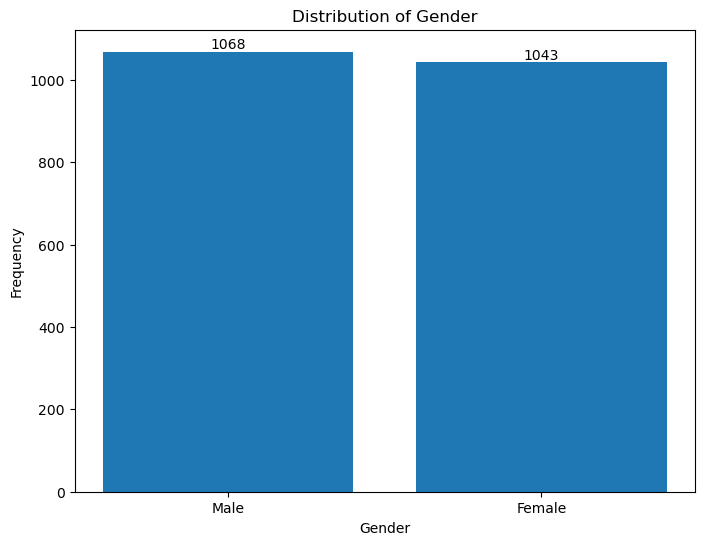

In [15]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.xticks(ticks=gender_counts.index, labels=['Male', 'Female'])

plt.show()


D'après le graphique, il y a une légère prédominance du genre masculin (1068 hommes) par rapport au genre féminin (1043 femmes). La distribution est assez équilibrée, ce qui est bénéfique pour les analyses comparatives par genre car cela minimise les biais potentiels dus à un déséquilibre de l'échantillon.

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

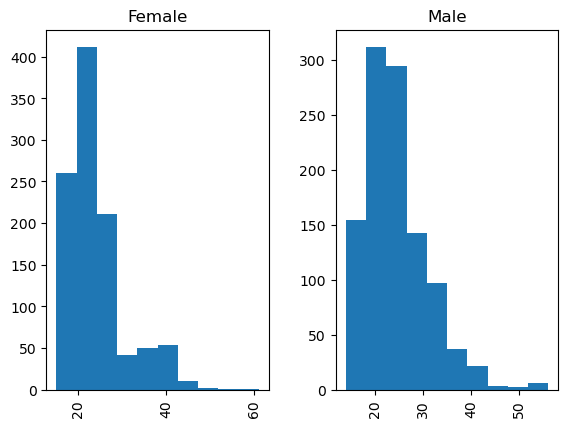

In [16]:
df.hist(column='Age',by='Gender')

Histogramme des Femmes :

La distribution de l'âge pour les femmes montre une concentration élevée dans les tranches d'âge les plus jeunes, avec un pic notable dans la vingtaine.
Il y a moins de femmes dans les tranches d'âge plus élevées, comme le montre la diminution rapide des fréquences après le pic initial.

Histogramme des Hommes :

La distribution pour les hommes montre également un pic dans la vingtaine, mais avec une décroissance moins marquée que chez les femmes pour les tranches d'âge plus élevées.

Ces distributions indiquent que l'ensemble de données est principalement composé de jeunes adultes, avec une proportion plus faible de participants d'âge moyen et plus âgés.

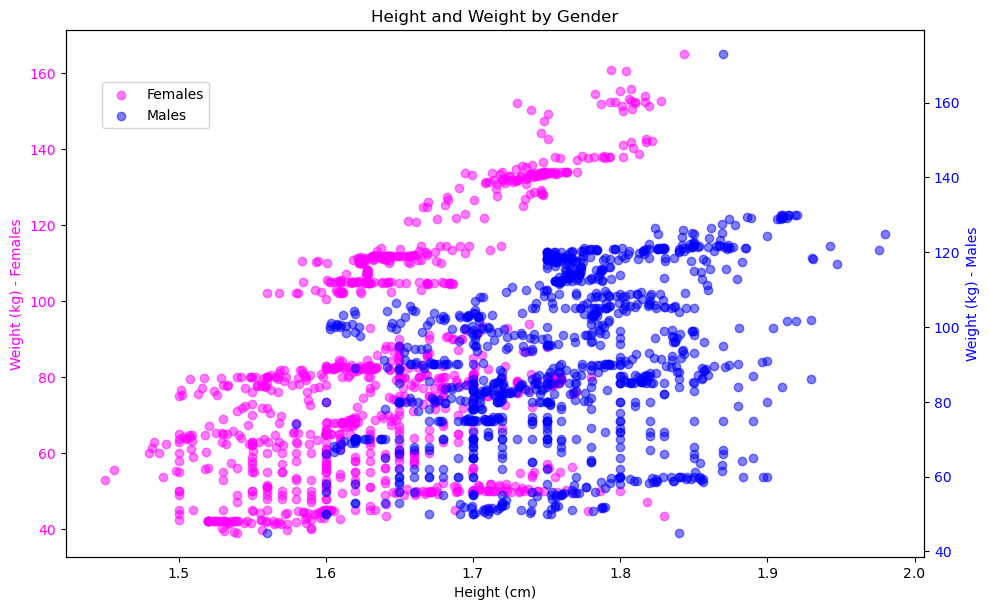

In [17]:
females = df[df['Gender'] == 'Female']
males = df[df['Gender'] == 'Male']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Weight (kg) - Females', color='magenta')
ax1.scatter(females['Height'], females['Weight'], color='magenta', label='Females', alpha=0.5)
ax1.tick_params(axis='y', labelcolor='magenta')

ax2 = ax1.twinx()
ax2.set_ylabel('Weight (kg) - Males', color='blue')
ax2.scatter(males['Height'], males['Weight'], color='blue', label='Males', alpha=0.5)
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Height and Weight by Gender')
plt.show()



Le nuage de points compare la taille (Height) et le poids (Weight) par genre (Gender). Sur l'axe horizontal, on a la taille en centimètres, et sur l'axe vertical, le poids en kilogrammes. Les points roses représentent les femmes (Females) et les points bleus représentent les hommes (Males).

Il semble y avoir une tendance générale pour les deux genres où le poids augmente avec la taille, ce qui est attendu.

Il y a des points isolés, en particulier chez les femmes, qui indiquent un poids très élevé pour des tailles relativement moyennes.

La variabilité du poids semble augmenter avec la taille chez les hommes. Chez les femmes, le poids semble plus concentré autour d'une plage médiane, bien que quelques valeurs extrêmes soient également présentes.

Il y a quelques cas extrêmes où les individus sont soit très grands soit très lourds par rapport au reste de l'échantillon, ce qui pourrait être des outliers ou des erreurs de saisie.

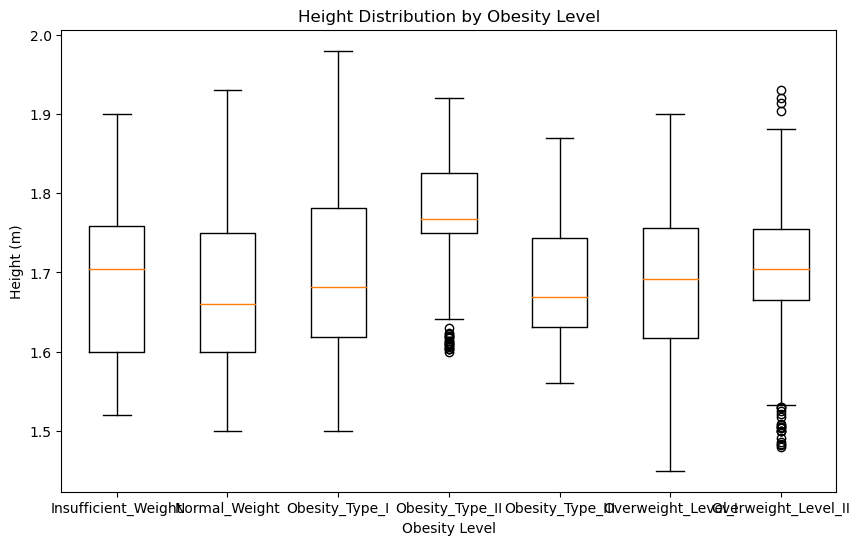

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([df[df['NObeyesdad'] == label]['Height'] for label in sorted(df['NObeyesdad'].unique())], labels=sorted(df['NObeyesdad'].unique()))

ax.set_title('Height Distribution by Obesity Level')
ax.set_xlabel('Obesity Level')
ax.set_ylabel('Height (m)')

plt.show()

Les médianes, indiquées par les lignes oranges dans chaque boîte, semblent relativement constantes à travers les catégories d'obésité, suggérant que la taille moyenne ne varie pas beaucoup entre les différents niveaux d'obésité.

L'étendue et l'IQR varient entre les catégories indiquent la variabilité des données. Plus la boîte est longue, plus l'éventail des valeurs de taille est grand. "Obesity Type I" a l'étendue la plus grande et "Obesity Type II" a l'étendue la plus étroite. D'autre part "Insufficient Weight" et "Obesity Type I" ont les IQR les plus grands et "Obesity Type II" a l'IQR le plus étroit.

Il y a des outliers dans plusieurs catégories, notamment "Obesity Type II" et "Overweight Level II". Ces points représentent des individus dont la taille est considérablement différente de celle de la majorité des autres dans la même catégorie d'obésité.

"Obesity Type I" et "Overweight Level I" ont des étendues et des IQR de tailles proches, tandis que "Obesity Type I" et "Obesity Type II" montrent une variabilité plus grande en taille.

Ces observations peuvent indiquer que la taille n'est pas un facteur déterminant du niveau d'obésité dans cet échantillon, puisque les médianes sont relativement constantes à travers les niveaux d'obésité. Les outliers soulignent l'importance d'examiner des cas individuels qui peuvent avoir des caractéristiques uniques ou des erreurs de saisie.

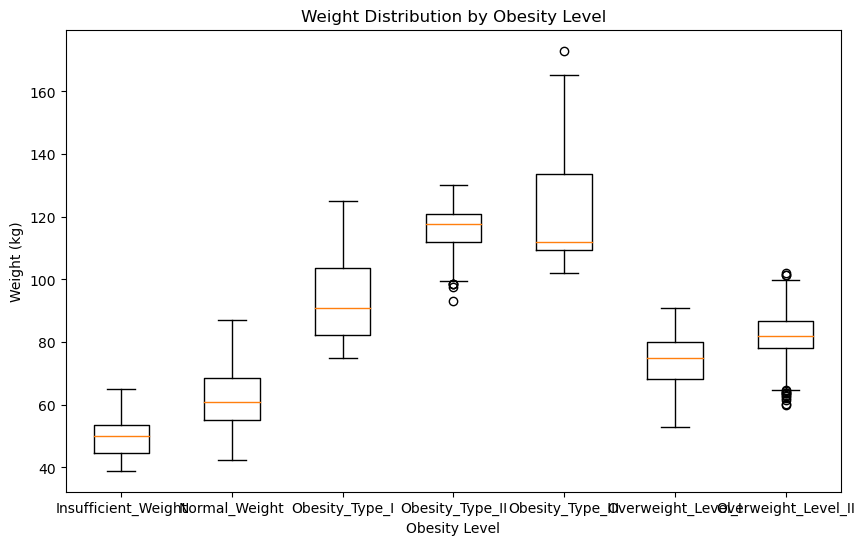

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([df[df['NObeyesdad'] == label]['Weight'] for label in sorted(df['NObeyesdad'].unique())], labels=sorted(df['NObeyesdad'].unique()))

ax.set_title('Weight Distribution by Obesity Level')
ax.set_xlabel('Obesity Level')
ax.set_ylabel('Weight (kg)')

plt.show()

La variabilité du poids augmente en passant de "Insufficient Weight" à "Obesity Type I", puis diminue en "Obesity Type II" et augmente une autre fois en "Obesity Type III" pour finalement diminuer en "Overweight Level I" et "Overweight Level II". Cela est visible à travers l'augmentation et la diminution de la taille des boîtes et la longueur des moustaches qui indiquent la variabilité hors des quartiles.

La médiane du poids, indiquée par la ligne orange dans chaque boîte, augmente à mesure que nous avançons de "Insufficient Weight" à "Obesity Type II," puis diminue en passant de "Obesity Type III" à "Overweight Level I" et augmente légèrement en "Overweight Level II". Cela suggère que le poids moyen des individus est plus élevé dans les catégories d'obésité plus sévères.

Plusieurs catégories présentent des outliers , ce qui signifie qu'il y a des individus dont le poids est considérablement différent de la moyenne de leur groupe. Cela pourrait indiquer la présence de cas individuels qui sont extrêmes.

Les individus avec un "Poids Insuffisant" et un "Poids Normal" ont des distributions de poids plus basses et moins variées que ceux avec des niveaux de surpoids ou d'obésité.

Les catégories d'obésité montrent une augmentation progressive de la médiane et de l'étendue, indiquant que le poids moyen et la plage de poids s'accroissent avec la sévérité de l'obésité.

Ces observations pourraient être utilisées pour évaluer les risques pour la santé associés à chaque niveau d'obésité et pour développer des interventions personnalisées en fonction du poids et du niveau d'obésité.

In [20]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['NObeyesdad'])

label_mapping_target = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping_target)

{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [21]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['MTRANS'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}


In [22]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['CAEC'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}


In [23]:
encoder = LabelEncoder()

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

# MLP 

In [24]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [27]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])

In [28]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('classifier', MLPClassifier(max_iter=1000, random_state=42))])

In [29]:
predictions = pipeline.predict(X_test)


In [30]:
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

Précision du modèle : 92.59%


In [31]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[83  3  0  0  0  0  0]
 [ 5 80  0  0  0  6  2]
 [ 0  0 98  0  0  0  4]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0 11  0  0  0 73  4]
 [ 0  1  2  0  0  7 69]]


In [32]:
class_report = classification_report(y_test, predictions)
print("Rapport de classification :\n", class_report)

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        86
           1       0.84      0.86      0.85        93
           2       0.97      0.96      0.97       102
           3       0.99      0.99      0.99        88
           4       1.00      0.99      0.99        98
           5       0.85      0.83      0.84        88
           6       0.87      0.87      0.87        79

    accuracy                           0.93       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.93      0.93      0.93       634



# KNN 

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
Y_pred = knn.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, Y_pred )
print(f"Précision du modèle : {accuracy * 100:.2f}%")

Précision du modèle : 86.28%


In [37]:
conf_matrix = confusion_matrix(y_test, Y_pred)
print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[81  5  0  0  0  0  0]
 [21 45  2  0  0 20  5]
 [ 0  0 97  2  1  1  1]
 [ 0  0  1 84  3  0  0]
 [ 0  0  0  0 98  0  0]
 [ 1  8  2  0  0 75  2]
 [ 0  2  8  0  0  2 67]]


# NB 

In [38]:
nb_classifier = GaussianNB()


In [39]:
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [40]:
y_pred = nb_classifier.predict(X_test)


In [41]:
accuracy = accuracy_score(y_test, y_pred )
print(f"Précision du modèle : {accuracy * 100:.2f}%")

Précision du modèle : 60.57%


In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[70  4  9  0  0  3  0]
 [32 33  7  0  0 14  7]
 [ 0  2 64 27  0  5  4]
 [ 0  0  9 78  0  1  0]
 [ 0  0  1  0 97  0  0]
 [ 4 11 44  0  0 25  4]
 [ 0  9 43  6  0  4 17]]


# Kmeans

In [43]:
cat_cols = [col for col in X.columns if X[col].dtypes=='O']

for i in cat_cols:
    lb = LabelEncoder()
    X[i] = lb.fit_transform(X[i])

In [44]:
X.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


In [45]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [46]:
X.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


In [47]:
kmeans = KMeans (n_clusters=5, n_init=10)
cluster = kmeans.fit_predict(X)
X['Obese_Segments'] = cluster

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [48]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [49]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obese_Segments
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,4
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,2
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,1
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,1
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,1
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,1


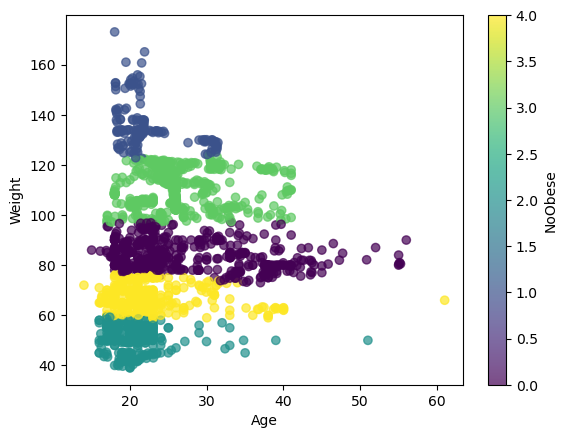

In [50]:

x = df['Age']
Y = df['Weight']
hue = X['Obese_Segments']


plt.scatter(x, Y, c=hue, cmap='viridis', alpha=0.7)

legend = plt.colorbar()
legend.set_label('NoObese')

plt.xlabel('Age')
plt.ylabel('Weight')

plt.show()

In [51]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [52]:
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Précision : {precision * 100:.2f}%")
print(f"Rappel : {recall * 100:.2f}%")

Matrice de confusion :
 [[84  2  0  0  0  0  0]
 [16 62  0  0  0 10  5]
 [ 0  0 96  5  0  0  1]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  6  0  0  0 71 11]
 [ 0  0  7  0  0 12 60]]
Accuracy: 0.8801261829652997
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        86
           1       0.89      0.67      0.76        93
           2       0.93      0.94      0.94       102
           3       0.94      1.00      0.97        88
           4       1.00      0.99      0.99        98
           5       0.76      0.81      0.78        88
           6       0.78      0.76      0.77        79

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.87       634
weighted avg       0.88      0.88      0.88       634

Précision : 88.14%
Rappel : 88.01%


In [53]:
svm_model = SVC(kernel='rbf')  
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Précision : {precision * 100:.2f}%")
print(f"Rappel : {recall * 100:.2f}%")

Matrice de confusion :
 [[71 15  0  0  0  0  0]
 [29 32  0  0  0 27  5]
 [ 0  0 34 14 19  2 33]
 [ 0  0  9 41 38  0  0]
 [ 0  0  0  0 98  0  0]
 [ 3 19  2  0  0 45 19]
 [ 0  7 14  0  0 16 42]]
Accuracy: 0.5725552050473186
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        86
           1       0.44      0.34      0.39        93
           2       0.58      0.33      0.42       102
           3       0.75      0.47      0.57        88
           4       0.63      1.00      0.77        98
           5       0.50      0.51      0.51        88
           6       0.42      0.53      0.47        79

    accuracy                           0.57       634
   macro avg       0.57      0.57      0.55       634
weighted avg       0.57      0.57      0.55       634

Précision : 57.40%
Rappel : 57.26%


In [54]:

svm_model = SVC(kernel='poly')  
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Précision : {precision * 100:.2f}%")
print(f"Rappel : {recall * 100:.2f}%")

Matrice de confusion :
 [[77  9  0  0  0  0  0]
 [32 35  0  0  0 22  4]
 [ 0  0 45 10  9  3 35]
 [ 0  0  8 35 45  0  0]
 [ 0  0  0  0 98  0  0]
 [ 4 24  1  0  0 41 18]
 [ 0  9 11  0  0 24 35]]
Accuracy: 0.5772870662460567
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        86
           1       0.45      0.38      0.41        93
           2       0.69      0.44      0.54       102
           3       0.78      0.40      0.53        88
           4       0.64      1.00      0.78        98
           5       0.46      0.47      0.46        88
           6       0.38      0.44      0.41        79

    accuracy                           0.58       634
   macro avg       0.58      0.57      0.56       634
weighted avg       0.59      0.58      0.56       634

Précision : 58.87%
Rappel : 57.73%


{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


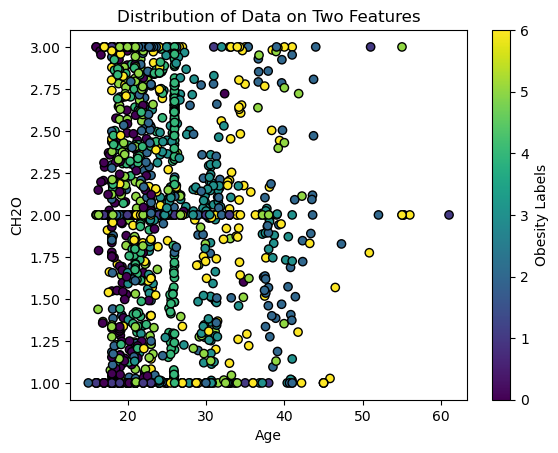

In [55]:


X_two_features = X_train[['Age', 'CH2O']].to_numpy()

# Plot the training points
plt.scatter(X_two_features[:, 0], X_two_features[:, 1], c=y_train, cmap='viridis', edgecolors='k')

cbar = plt.colorbar()
cbar.set_label('Obesity Labels')
plt.xlabel('Age')
plt.ylabel('CH2O')
plt.title('Distribution of Data on Two Features')
print(label_mapping_target)
# Show the plot
plt.show()

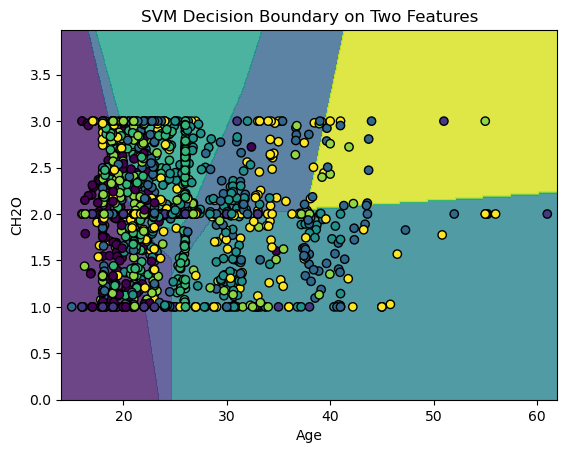

In [56]:

X_two_features = X_train[['Age', 'CH2O']].to_numpy()




svm_model_two_features = SVC(kernel='linear')
svm_model_two_features.fit(X_two_features, y_train)

h = .02  
x_min, x_max = X_two_features[:, 0].min() - 1, X_two_features[:, 0].max() + 1
y_min, y_max = X_two_features[:, 1].min() - 1, X_two_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = svm_model_two_features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

plt.scatter(X_two_features[:, 0], X_two_features[:, 1], c=y_train, cmap='viridis', edgecolors='k')


plt.xlabel('Age')
plt.ylabel('CH2O')
plt.title('SVM Decision Boundary on Two Features')


plt.show()


# Decision Tree

In [57]:
x = df.iloc[:,:-1].values
y = df.iloc[:,16].values

In [58]:
label_encoder_x = LabelEncoder()
for i in [0, 4, 5, 8, 9, 11, 14, 15] :
    x[:, i] = label_encoder_x.fit_transform(x[:, i])

In [59]:
labelencoder_y= LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [60]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42)

In [61]:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [62]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
y_pred = classifier.predict(x_test)

In [64]:
cm = confusion_matrix(y_test, y_pred)

In [65]:
accuracy = accuracy_score(y_test, y_pred )

# Hierarchical Clustering

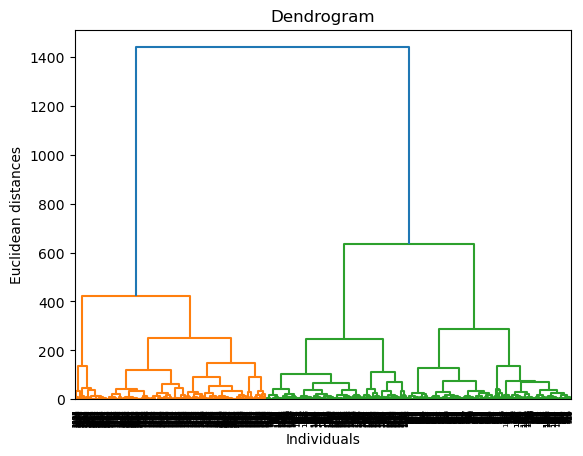

In [66]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Individuals')
plt.ylabel('Euclidean distances')
plt.show()

In [67]:
hc = AgglomerativeClustering(n_clusters = 7, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [68]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
n_clusters = 7

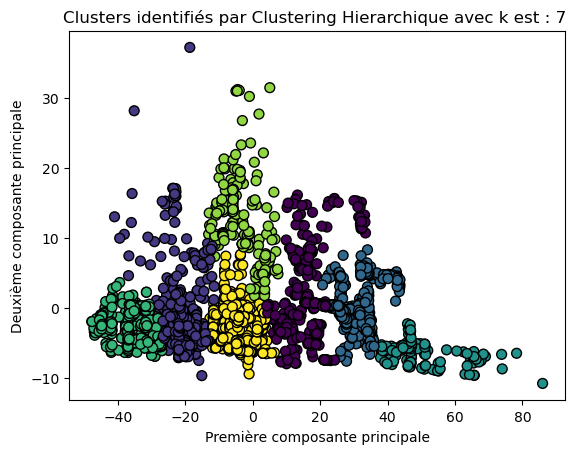

In [69]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_hc, cmap='viridis', edgecolors='k', s=50)
plt.title(f"Clusters identifiés par Clustering Hierarchique avec k est : {n_clusters} ")
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()